<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/04_Discovering_interpretable_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>Discovering interpretable features</h1> 
</strong>

---


In this Notebook, We'll learn about a dimension reduction technique called "**Non-negative matrix factorization**" ("NMF") that expresses samples as combinations of interpretable parts. For example, it expresses documents as combinations of topics, and images in terms of commonly occurring visual patterns. You'll also learn to use NMF to build recommender systems that can find you similar articles to read, or musical artists that match your listening history!

In [1]:
! git clone https://github.com/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python.git

fatal: destination path 'CAREER-TRACK-Data-Scientist-with-Python' already exists and is not an empty directory.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

plt.style.use('ggplot')
#sns.set_theme(style='whitegrid')
%matplotlib inline

In [3]:
os.chdir('/content/CAREER-TRACK-Data-Scientist-with-Python/27_Unsupervised Learning in Python/_dataset')
cwd = os.getcwd()
print('Curent working directory is ', cwd)

Curent working directory is  /content/CAREER-TRACK-Data-Scientist-with-Python/27_Unsupervised Learning in Python/_dataset


In [4]:
ls

 company-stock-movements-2010-2015-incl.csv  'Musical artists'/
 eurovision-2016.csv                          new_points.csv
 fish.csv                                     points.csv
 Grains/                                     'Wikipedia articles'/
 lcd-digits.csv                               wine.csv


## **Non-Negative matrix factorization (NMF)**
- NMF = Non-negative matrix factorization
    - Dimension reduction technique
    - NMF models are interpretable (unlike PCA)
    - Easy to interpret means easy to explain
    - However, all sample features must be non-negative 
($\ge0$)

- NMF components
    - Just like PCA has principal components
    - Dimension of components = dimension of samples
    - Entries are non-negative
    - Can be used to reconstruct the samples
    - Combine feature values with components
- Sample reconstruction
    - Multiply components by feature values, and add up
    - Can also be expressed as a product of matrices
    - This is the "Matrix Factorization" in "NMF"

### NMF applied to Wikipedia articles

NMF applied to transform a **toy** word-frequency array. Now we can apply it NMF, this time using the tf-idf word-frequency array of Wikipedia articles, given as a `csr_matrix` ```articles```. Here, fit the model and transform the articles.

#### Preprocess

In [5]:
from scipy.sparse import csr_matrix

documents = pd.read_csv('Wikipedia articles/wikipedia-vectors.csv', index_col=0)
titles = documents.columns
articles = csr_matrix(documents.values).T

In [6]:
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.40480628e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 5.66624997e-01]
 [3.82062004e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.98660580e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 3.81753073e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.85534472e-01]
 [1.29292547e-02 1.37892421e-02 7.76312786e-03 3.34460753e-02
  0.00000000e+00 3.34534165e-01]
 [0.00000000e+00 0.00000000e+00 2.06740475e-02 0.00000000e+00
  6.04541756e-03 3.59073381e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 4.90994297e-01]
 [1.54276238e-02 1.42820095e-02 3.76630629e-03 2.37094483e-02
  2.62642622e-02 4.80791408e-01]
 [1.11740179e-02 3.13683927e-02 3.09482055e-02 6.56950627e-02
  1.96693535e-02 3.38301150e-01]
 [0.00000000e+00 0.00000000e+00 5.30713694e-01 0.0

### NMF features of the Wikipedia articles
Now you will explore the NMF features you created in the previous exercise. A solution to the previous exercise has been pre-loaded, so the array ```nmf_features``` is available. Also available is a list titles giving the ```title``` of each Wikipedia article.

When investigating the features, notice that for both actors, the NMF feature 3 has by far the highest value. This means that both articles are reconstructed using mainly the 3rd NMF component. In the next video, you'll see why: NMF components represent topics (for instance, acting!).

In [7]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

0    0.003846
1    0.000000
2    0.000000
3    0.575669
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422349
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64


### NMF reconstructs samples
In this exercise, you'll check your understanding of how NMF reconstructs samples from its components using the NMF feature values. On the right are the components of an NMF model. If the NMF feature values of a sample are ```[2, 1]```, then which of the following is most likely to represent the original sample? A pen and paper will help here! You have to apply the same technique Ben used in the video to reconstruct the sample ```[0.1203 0.1764 0.3195 0.141]```.

In [8]:
sample_feature = np.array([2, 1])
components = np.array([[1. , 0.5, 0. ],
                       [0.2, 0.1, 2.1]])

In [9]:
np.matmul(sample_feature.T, components)

array([2.2, 1.1, 2.1])

## NMF learns interpretable parts


### NMF learns topics of documents
In the video, you learned when NMF is applied to documents, the components correspond to topics of documents, and the NMF features reconstruct the documents from the topics. Verify this for yourself for the NMF model that you built earlier using the Wikipedia articles. Previously, you saw that the 3rd NMF feature value was high for the articles about actors Anne Hathaway and Denzel Washington. In this exercise, identify the topic of the corresponding NMF component.

The NMF model you built earlier is available as ```model```, while ```words``` is a list of the words that label the columns of the word-frequency array.

After you are done, take a moment to recognise the topic that the articles about Anne Hathaway and Denzel Washington have in common!

#### Preprocess

In [10]:
words = []
with open('Wikipedia articles/wikipedia-vocabulary-utf8.txt') as f:
    words = f.read().splitlines()

In [11]:
# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3]

# Print result of nlargest
print(component.nlargest())

(6, 13125)
film       0.627922
award      0.253150
starred    0.245302
role       0.211466
actress    0.186411
Name: 3, dtype: float64


### Explore the LED digits dataset
In the following exercises, you'll use NMF to decompose grayscale images into their commonly occurring patterns. Firstly, explore the image dataset and see how it is encoded as an array. You are given 100 images as a 2D array ```samples```, where each row represents a single 13x8 image. The images in your dataset are pictures of a LED digital display.

#### Preprocess

In [12]:
df = pd.read_csv('lcd-digits.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
samples = df.values

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


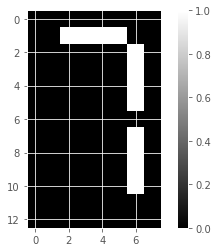

In [14]:
# Select the 0th row: digit
digit = samples[0]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13, 8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()

### NMF learns the parts of images
Now use what you've learned about NMF to decompose the digits dataset. You are again given the digit images as a 2D array ```samples```. This time, you are also provided with a function ```show_as_image()``` that displays the image encoded by any 1D array:
```python
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()
```


In [15]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()

[4.76823559e-01 0.00000000e+00 0.00000000e+00 5.90605054e-01
 4.81559442e-01 0.00000000e+00 7.37551667e-16]


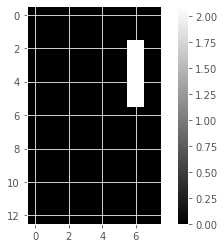

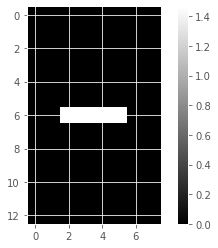

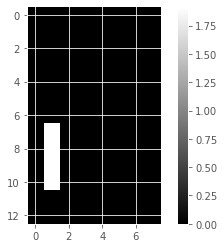

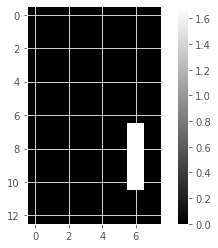

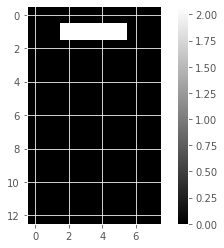

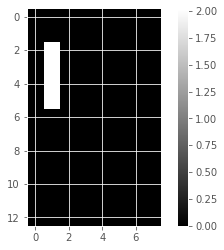

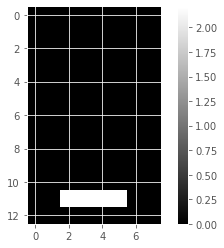

In [16]:
# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    
# Assign the 0th row of features: digit_features
digit_features = features[0]

# Print digit_features
print(digit_features)

### PCA doesn't learn parts
Unlike NMF, PCA doesn't learn the parts of things. Its components do not correspond to topics (in the case of documents) or to parts of images, when trained on images. Verify this for yourself by inspecting the components of a PCA model fit to the dataset of LED digit images from the previous exercise. The images are available as a 2D array ```samples```. Also available is a modified version of the ```show_as_image()``` function which colors a pixel red if the value is negative.

After submitting the answer, notice that the components of PCA do not represent meaningful parts of images of LED digits!

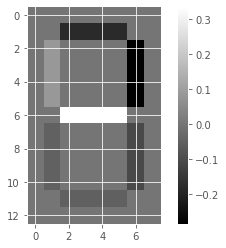

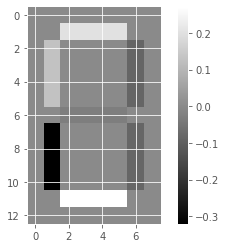

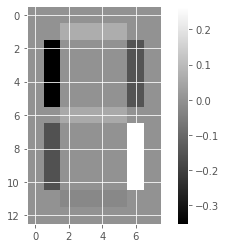

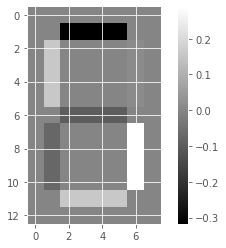

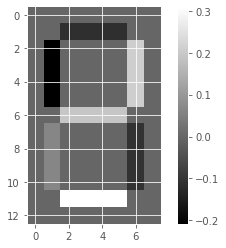

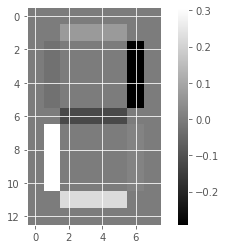

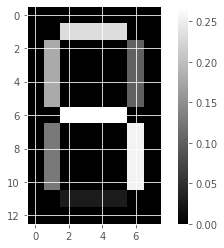

In [17]:
from sklearn.decomposition import PCA

# Createa PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

## Building recommender systems using NMF
- Finding similar articles
    - Engineer at a large online newspaper
    - Task: recommand articles similar to article being read by customer
    - Similar articles should have similar topics
- Strategy
    - Apply NMF to the word-frequency array
    - NMF feature values describe the topics, so similar documents have similar NMF feature values
    - Compare NMF feature values?
- Versions of articles
    - Different versions of the same document have same topic proportions
    - exact feature values may be different!
        E.g., because one version uses many meaningless words
    - But all versions lie on the same line through the origin
- Cosine Similarity

    - Uses the angle between the lines
    - Higher values means more similar
    - Maximum value is 1, when angle is 0 degrees
    
![cosine similarity](https://www.oreilly.com/library/view/statistics-for-machine/9781788295758/assets/2b4a7a82-ad4c-4b2a-b808-e423a334de6f.png)

### Which articles are similar to 'Cristiano Ronaldo'?
In the video, you learned how to use NMF features and the cosine similarity to find similar articles. Apply this to your NMF model for popular Wikipedia articles, by finding the articles most similar to the article about the footballer Cristiano Ronaldo. The NMF features you obtained earlier are available as ```nmf_features```, while ```titles``` is a list of the article titles.

In [18]:
from sklearn.preprocessing import normalize

# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=titles)

# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc['Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display thouse with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


### Recommend musical artists part I
In this exercise and the next, you'll use what you've learned about NMF to recommend popular music artists! You are given a sparse array ```artists``` whose rows correspond to artists and whose columns correspond to users. The entries give the number of times each artist was listened to by each user.

In this exercise, build a pipeline and transform the array into normalized NMF features. The first step in the pipeline, ```MaxAbsScaler```, transforms the data so that all users have the same influence on the model, regardless of how many different artists they've listened to. In the next exercise, you'll use the resulting normalized NMF features for recommendation!

#### Preprocess

In [19]:
from scipy.sparse import coo_matrix

df = pd.read_csv('Musical artists/scrobbler-small-sample.csv')
artists1 = df.sort_values(['artist_offset', 'user_offset'], ascending=[True, True])
row_ind = np.array(artists1['artist_offset'])
col_ind = np.array(artists1['user_offset'])
data1 = np.array(artists1['playcount'])
artists = coo_matrix((data1, (row_ind, col_ind)))

In [20]:
artists

<111x500 sparse matrix of type '<class 'numpy.int64'>'
	with 2894 stored elements in COOrdinate format>

In [21]:
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler, nmf, normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)

### Recommend musical artists part II
Suppose you were a big fan of Bruce Springsteen - which other musicial artists might you like? Use your NMF features from the previous exercise and the cosine similarity to find similar musical artists. A solution to the previous exercise has been run, so ```norm_features``` is an array containing the normalized NMF features as rows. The names of the musical artists are available as the list ```artist_names```.

#### Preprocess

In [22]:
df = pd.read_csv('Musical artists/artists.csv', header=None)
artist_names = df.values.reshape(111).tolist()

In [23]:
artist_names

['Massive Attack',
 'Sublime',
 'Beastie Boys',
 'Neil Young',
 'Dead Kennedys',
 'Orbital',
 'Miles Davis',
 'Leonard Cohen',
 'Van Morrison',
 'NOFX',
 'Rancid',
 'Lamb',
 'Korn',
 'Dropkick Murphys',
 'Bob Dylan',
 'Eminem',
 'Nirvana',
 'Van Halen',
 'Damien Rice',
 'Elvis Costello',
 'Everclear',
 'Jimi Hendrix',
 'PJ Harvey',
 'Red Hot Chili Peppers',
 'Ryan Adams',
 'Soundgarden',
 'The White Stripes',
 'Madonna',
 'Eric Clapton',
 'Bob Marley',
 'Dr. Dre',
 'The Flaming Lips',
 'Tom Waits',
 'Moby',
 'Cypress Hill',
 'Garbage',
 'Fear Factory',
 '50 Cent',
 'Ani DiFranco',
 'Matchbox Twenty',
 'The Police',
 'Eagles',
 'Phish',
 'Stone Temple Pilots',
 'Black Sabbath',
 'Britney Spears',
 'Fatboy Slim',
 'System of a Down',
 'Simon & Garfunkel',
 'Snoop Dogg',
 'Aimee Mann',
 'Less Than Jake',
 'Rammstein',
 'Reel Big Fish',
 'The Prodigy',
 'Pantera',
 'Foo Fighters',
 'The Beatles',
 'Incubus',
 'Audioslave',
 'Bright Eyes',
 'Machine Head',
 'AC/DC',
 'Dire Straits',
 'Motör

In [24]:
# Createa DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())

Bruce Springsteen    1.000000
Neil Young           0.956077
Van Morrison         0.872279
Leonard Cohen        0.865370
Bob Dylan            0.859356
dtype: float64
